In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\DEVARSH
[nltk_data]     TRIVEDI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
df=pd.read_csv('test.csv')
df

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


In [3]:
# adding an row_id field to the dataframe, which will be useful for joining later
df["row_id"] = df.index + 1
#print first 10 rows 
print (df.head(10))

      id                                              tweet  row_id
0  31963  #studiolife #aislife #requires #passion #dedic...       1
1  31964   @user #white #supremacists want everyone to s...       2
2  31965  safe ways to heal your #acne!!    #altwaystohe...       3
3  31966  is the hp and the cursed child book up for res...       4
4  31967    3rd #bihday to my amazing, hilarious #nephew...       5
5  31968                        choose to be   :) #momtips        6
6  31969  something inside me dies ð¦ð¿â¨  eyes nes...       7
7  31970  #finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...       8
8  31971   @user @user @user i will never understand why...       9
9  31972  #delicious   #food #lovelife #capetown mannaep...      10


In [5]:
#create a new data frame with "id" and "comment" fields
df_subset = df[['row_id', 'tweet']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['tweet'] = df_subset['tweet'].str.replace("[^a-zA-Z]", " ")
#covert to lower-case
df_subset['tweet'] = df_subset['tweet'].str.casefold()
print (df_subset.head(10))

   row_id                                              tweet
0       1   studiolife  aislife  requires  passion  dedic...
1       2    user  white  supremacists want everyone to s...
2       3  safe ways to heal your  acne       altwaystohe...
3       4  is the hp and the cursed child book up for res...
4       5     rd  bihday to my amazing  hilarious  nephew...
5       6                        choose to be       momtips 
6       7  something inside me dies              eyes nes...
7       8   finished tattoo inked ink loveit             ...
8       9    user  user  user i will never understand why...
9      10   delicious    food  lovelife  capetown mannaep...


C:\Users\DEVARSH TRIVEDI\AppData\Local\Temp\ipykernel_10116\1653426484.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['tweet'] = df_subset['tweet'].str.replace("[^a-zA-Z]", " ")


In [6]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [9]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
#         t_df=t_df.append(df1)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...
   row_id sentiment_type  sentiment_score
0   17197       compound           0.8149


In [10]:
#merge dataframes
df_output = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
print(df_output.head(10))

      id                                              tweet  row_id  \
0  49159  my   song "so glad" free download!  #shoegaze ...   17197   

  sentiment_type  sentiment_score  
0       compound           0.8149  


In [11]:
df_output[["sentiment_score"]].describe()

,sentiment_score
count,1.0000
mean,0.8149
std,NaN
min,0.8149
25%,0.8149
50%,0.8149
75%,0.8149
max,0.8149


<AxesSubplot:title={'center':'sentiment_score'}, xlabel='Team', ylabel='Mean Sentiment Score'>

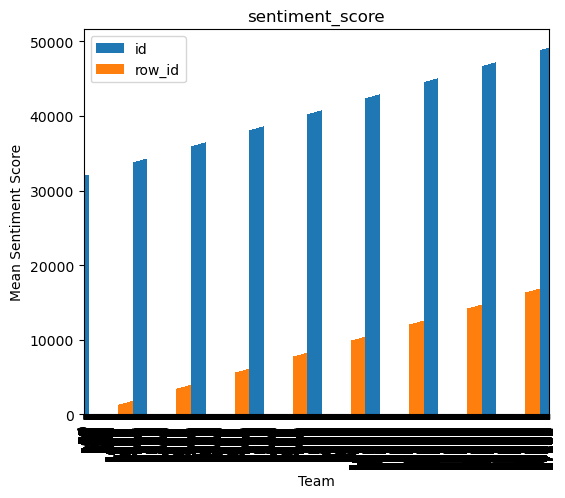

In [12]:
df.plot(kind='bar', title='sentiment_score', ylabel='Mean Sentiment Score',
         xlabel='Team', figsize=(6, 5))